# Introduction

In this project, we will be looking at movie datasets in order to give recommendations to Microsoft's new movie studio.

Entertainment is a huge, global market. According to [Forbes](https://www.forbes.com/sites/rosaescandon/2020/03/12/the-film-industry-made-a-record-breaking-100-billion-last-year/?sh=5404bc6634cd), the film industry made over 100 billion dollars in 2019. While that is a significant chunck of change, there is also a significate overhead in creating entertainment content. It is important for fledgling movie studios to research what type of content does well, so that they can use this information as a guide to replicate that success. As Microsoft is interested in making movies, the following project with focus on that component of the entertainment industry.




## Data Sources

In order to glean information relevant to movie-making we will be looking at two datasets from https://www.imdb.com/ and https://www.boxofficemojo.com/. 

- IMDB stands for Internet Movie Database and is one of the most popular and comprehensive internet sources for movie and entertainment data. The dataset we are working with focuses on information about movies - the producers, the genres, the actors, the movies ratings, ect. 

- Box Office Mojo is a site that tracks box-office revenue, and the data set we will be using from them contains this information. 

By using these two datasets together, we can extract if certain aspects of a movie lead to higher box-office revenue, which is a industry standard for movie success. 

**Limitations** 

This data is only on movies, thus it can not be extrapolated to the entire entertainment industry. Additionally, as the dataset only contains the total gross, it will not include the costs of creating the movies. Finally, the dataset only looks at box office revenue, which means that the total revenue (from streaming sites or other source) may be higher.  



## Objectives
 - Import datasets and do an initial viewing. 
 - Ask some relevant questions! 
 - Find answers to those questions, and do some analysis.
 - Conclusion.

# Method

First we are going to import some required packages needed to process the data. Then we will connect to our datasets and take a peek inside. 

In [2]:
!pip install autopep8

In [3]:
# importing required packages
import warnings
import zipfile
import seaborn as sns
import sqlite3 as sql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
# unzip data
with zipfile.ZipFile('zipped_data/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

## IMDB Dataset

In [3]:
# create connection to the database and cursor object:
conn = sql.connect('data/im.db')
cur = conn.cursor()

# find table names
cur.execute(""" SELECT name 
                FROM sqlite_master 
                WHERE type = 'table';""")

# fetch the result and store it in table_names
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

Above we see 8 tables names - lets look into those tables now. 

For the `movie_basics` table:

In [4]:
# creating movie_basics dataframe
imbd_movie_basics = pd.read_sql("""
                                SELECT * 
                                FROM movie_basics;
                                """, conn)

imbd_movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None



For the `directors` table:

In [5]:
# creating a dataframe for the directors table
imbd_directors = pd.read_sql("""
                                SELECT * 
                                FROM directors;
                                """, conn)

imbd_directors

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248




For the `known_for` table:

In [6]:
# getting data and creating the dataframe for the known_for table
imbd_known_for = pd.read_sql("""
                                SELECT * 
                                FROM known_for;
                                """, conn)
imbd_known_for

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
...,...,...
1638255,nm9990690,tt9090932
1638256,nm9990690,tt8737130
1638257,nm9991320,tt8734436
1638258,nm9991320,tt9615610


For the `movie_akas` table:

In [7]:
# creating the dataframe for the movie_akas table
imbd_movie_akas = pd.read_sql("""
                                SELECT * 
                                FROM movie_akas;
                                """, conn)
imbd_movie_akas

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


For the `movie_ratings` table:

In [8]:
# creating the dataframe for the movie_ratings table
imbd_movie_ratings = pd.read_sql("""
                                SELECT * 
                                FROM movie_ratings;
                                """, conn)
imbd_movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


For the `persons` table:

In [9]:
# creating the dataframe for the persons table
imbd_persons = pd.read_sql("""
                                SELECT * 
                                FROM persons;
                                """, conn)
imbd_persons

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


For the `principals` table:

In [10]:
# creating the dataframe for the principals table
imbd_principals = pd.read_sql("""
                                SELECT * 
                                FROM principals;
                                """, conn)
imbd_principals

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


For the `writers` table:

In [11]:
# creating the dataframe for the writers table
imbd_writers = pd.read_sql("""
                                SELECT * 
                                FROM writers;
                                """, conn)
imbd_writers

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825


## Box Office Mojo (BOM) Dataset

First we are going to read and create the BOM dataframe. Then we will clean it a little, and check the column value types for the BOM dataset (`bom_df`). 

In [12]:
# reaing the data and checking the columns data types
bom_df = pd.read_csv('zipped_data/bom.movie_gross (1).csv.gz')
print(bom_df.dtypes)

# getting rid of commas before we make the transformation
bom_df['foreign_gross'] = bom_df['foreign_gross'].str.replace(',', '')

# transforming the string object into a float
bom_df = bom_df.astype({'foreign_gross': np.float})

# checking to see if it worked
print(bom_df.dtypes)

# check to see number of NaN values in `foreign_gross`
print(
    f"Number of null values in 'foreign_gross' column :{bom_df['foreign_gross'].isnull().sum()}")

# check to see number of NaN values in `title`
print(
    f"Number of null values in 'title' column :{bom_df['title'].isnull().sum()}")

# drop rows with NaN values in `foreign_gross`
bom_df.dropna(subset=['foreign_gross'], inplace=True)

# check for NaN values in `foreign_gross`
print(
    f"Number of null values in 'foreign_gross' column after cleaning :{bom_df['foreign_gross'].isnull().sum()}")

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object
title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object
Number of null values in 'foreign_gross' column :1350
Number of null values in 'title' column :0
Number of null values in 'foreign_gross' column after cleaning :0


In [13]:
# cleaned dataset!
bom_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018
3309,Time Freak,Grindstone,10000.0,256000.0,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018


## Questions about the data:

- Do certain genres result in higher grossing films?
- Is there a relationship between specific actors and higher grossing films?
- Do movies with higher average ratings result in higher grossing films?

Hopefully, after answering these questions we will have some reccomendations for Microsoft in order to direct them how to make high-grossing, successfull films!

### Do certain genres result in higher grossing films?
In order to answer this question we need to make sure our datatypes are the way we want them.

Lets start by saving `bom_df` in a SQLite database, so that we can then use SQLite to join and query the `bom_df` data set and the `imbd_movie_basics` data set.

In [14]:
bom_df.to_sql('bom_df', conn)

Now we can query `bom_df` using SQLite.

In [15]:
pd.read_sql("""
                SELECT * 
                FROM bom_df;
                """, conn)

,index,title,studio,domestic_gross,foreign_gross,year
0,0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,3,Inception,WB,292600000.0,535700000.0,2010
4,4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...,...
2032,3275,I Still See You,LGF,1400.0,1500000.0,2018
2033,3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018
2034,3309,Time Freak,Grindstone,10000.0,256000.0,2018
2035,3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018


Now we're going to join the two tables based on movie title and year.

In [16]:
# we don't need the movie_id column for the first question, but we will in the second question
bom_movie_basics_joined = pd.read_sql('''
    SELECT bom_df.title, bom_df.foreign_gross, movie_basics.genres, bom_df.year, movie_basics.movie_id
    FROM bom_df
        INNER JOIN movie_basics
            /* Joining on title and year, so as to have the most accurate resulting dataset */
        ON bom_df.title=movie_basics.original_title AND bom_df.year=movie_basics.start_year
    ORDER BY foreign_gross DESC;
''', conn)
bom_movie_basics_joined

,title,foreign_gross,genres,year,movie_id
0,Avengers: Age of Ultron,946400000.0,"Action,Adventure,Sci-Fi",2015,tt2395427
1,Jurassic World: Fallen Kingdom,891800000.0,"Action,Adventure,Sci-Fi",2018,tt4881806
2,Frozen,875700000.0,"Adventure,Animation,Comedy",2013,tt2294629
3,Transformers: Age of Extinction,858600000.0,"Action,Adventure,Sci-Fi",2014,tt2109248
4,Minions,823400000.0,"Adventure,Animation,Comedy",2015,tt2293640
...,...,...,...,...,...
1194,Client 9: The Rise and Fall of Eliot Spitzer,3500.0,Documentary,2010,tt1638362
1195,Avengers: Infinity War,1369.5,"Action,Adventure,Sci-Fi",2018,tt4154756
1196,Jurassic World,1019.4,"Action,Adventure,Sci-Fi",2015,tt0369610
1197,The Fate of the Furious,1010.0,"Action,Crime,Thriller",2017,tt4630562


In [17]:
bom_movie_basics_joined[bom_movie_basics_joined["title"].duplicated()]

,title,foreign_gross,genres,year,movie_id
25,Coco,597400000.0,Horror,2017,tt7002100
333,The Artist,88800000.0,Thriller,2011,tt1825978
356,Lights Out,81600000.0,Documentary,2016,tt5328340
388,The Bounty Hunter,69300000.0,None,2010,tt1472211
451,Abduction,54000000.0,"Horror,Thriller",2011,tt2447982
454,Truth or Dare,53900000.0,"Comedy,Drama,Romance",2018,tt6869948
461,Spotlight,53200000.0,Drama,2015,tt7785302
477,The Walk,51000000.0,"Adventure,Biography,Drama",2015,tt3488710
482,Burlesque,50100000.0,Drama,2010,tt1586713
534,Legend,41100000.0,"Biography,Crime,Drama",2015,tt3569230


We can use `.shape` to find the number of duplicated rows:

In [18]:
bom_movie_basics_joined[bom_movie_basics_joined["title"].duplicated()].shape

(23, 5)

So we have 1199 rows in our complete joined file, and 23 duplicated rows within that. Accounting for the duplication, that means that around 46 lines are doubled. 46/1299 equals to a bit less than 4%. Since it's impossible without incorperating more data to tell these duplicated movies apart (and make sure the right profits/genres are ascribed to the right movie), I'm going to delete all of them from our dataset.  

In [19]:
bom_movie_basics_joined.drop_duplicates(
    subset=['title', 'year'], keep=False, inplace=True)
bom_movie_basics_joined

,title,foreign_gross,genres,year,movie_id
0,Avengers: Age of Ultron,946400000.0,"Action,Adventure,Sci-Fi",2015,tt2395427
1,Jurassic World: Fallen Kingdom,891800000.0,"Action,Adventure,Sci-Fi",2018,tt4881806
2,Frozen,875700000.0,"Adventure,Animation,Comedy",2013,tt2294629
3,Transformers: Age of Extinction,858600000.0,"Action,Adventure,Sci-Fi",2014,tt2109248
4,Minions,823400000.0,"Adventure,Animation,Comedy",2015,tt2293640
...,...,...,...,...,...
1194,Client 9: The Rise and Fall of Eliot Spitzer,3500.0,Documentary,2010,tt1638362
1195,Avengers: Infinity War,1369.5,"Action,Adventure,Sci-Fi",2018,tt4154756
1196,Jurassic World,1019.4,"Action,Adventure,Sci-Fi",2015,tt0369610
1197,The Fate of the Furious,1010.0,"Action,Crime,Thriller",2017,tt4630562


Okay! Now that our data set has been cleaned a little bit, lets get back to our original question; Do certain genres result in higher grossing films? In order to look at this, we will need to seperate the listed genres.


In [20]:
bom_movie_basics_joined['genres'] = bom_movie_basics_joined['genres'].str.split(
    pat=',')
bom_movie_basics_exploded = bom_movie_basics_joined.explode(
    'genres', ignore_index=True)

Now lets take a look at our data:

In [21]:
print(bom_movie_basics_exploded.dtypes)
bom_movie_basics_exploded

title             object
foreign_gross    float64
genres            object
year               int64
movie_id          object
dtype: object


,title,foreign_gross,genres,year,movie_id
0,Avengers: Age of Ultron,946400000.0,Action,2015,tt2395427
1,Avengers: Age of Ultron,946400000.0,Adventure,2015,tt2395427
2,Avengers: Age of Ultron,946400000.0,Sci-Fi,2015,tt2395427
3,Jurassic World: Fallen Kingdom,891800000.0,Action,2018,tt4881806
4,Jurassic World: Fallen Kingdom,891800000.0,Adventure,2018,tt4881806
...,...,...,...,...,...
2990,The Fate of the Furious,1010.0,Crime,2017,tt4630562
2991,The Fate of the Furious,1010.0,Thriller,2017,tt4630562
2992,Chasing Mavericks,600.0,Biography,2012,tt1629757
2993,Chasing Mavericks,600.0,Drama,2012,tt1629757


Okay! So now we have a full workable list of the movies and their genres. 
Lets find the average amount each genre made in the dataset.

We are using the average here, as the dataset is fairly large (2995 movies) and so we are not as concerned about outliers skewing the data. 

In [33]:
bom_movie_basics_exploded_avg = bom_movie_basics_exploded.groupby(
    ['genres']).foreign_gross.mean().reset_index()
bom_movie_basics_exploded_avg

,genres,foreign_gross
0,Action,1.591982e+08
1,Adventure,2.297876e+08
2,Animation,2.518275e+08
3,Biography,4.951967e+07
4,Comedy,8.502199e+07
5,Crime,4.157536e+07
6,Documentary,1.201011e+07
7,Drama,4.738446e+07
8,Family,9.907607e+07
9,Fantasy,1.643918e+08


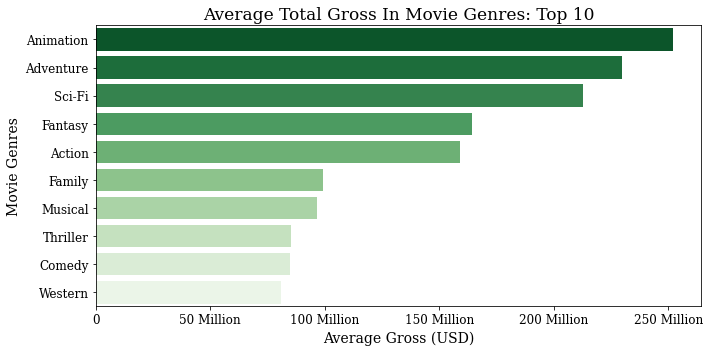

In [32]:
# setting universal font type for this and future graphs
plt.rcParams.update({'font.family': 'serif'})

# specify size of plot
fig, ax = plt.subplots(figsize=(10, 5))

# create bar plot of top 10 grossing genres
sns.barplot(data=bom_movie_basics_exploded_avg.sort_values(by='foreign_gross', ascending=False).head(10),
            x='foreign_gross',
            y='genres',
            ci=None,
            palette='Greens_r')

# lable and define fontsize for main and axes titles
plt.xlabel('Average Gross (USD)', fontsize=14)
plt.ylabel('Movie Genres', fontsize=14)
plt.title('Average Total Gross In Movie Genres: Top 10', fontsize=17)
plt.tick_params(axis='both', which='major', labelsize=12)

# set x-axes tick labels
ax.set_xticklabels(['0', '50 Million', '100 Million',
                   '150 Million', '200 Million', '250 Million'])

# get rid of scientific notation
plt.tight_layout()
plt.show()

#### Answer: Do certain genres result in higher grossing films?

Based on the above graph, we see that there are generes that have on average higher grossing films

The top 5 genres according to the above graph are:
 - **animation**
 - **adventure** 
 - **sci-fi** 
 - **fantasy**
 - **action**
 
As such, I would advise Microsoft to focus on these 5 genres in their initial films for their new movie studio. Many of these genres can and do overlap in films, so it may be best to focus on animated movies with sub-genres of adventure, sci-fi, fantasy, or action. 

### Is there a relationship between specific actors and higher grossing films?

In order to answer this question, were going to have to create a cohesive data set where we have the actors, the various films they acted in, and the total amount the movies made once they were put out.

To do this, lets create an inner join between `bom_df`, `movie_basics`, `principles` and `persons`.

In [24]:
join_actors_gross = pd.read_sql("""
    SELECT bom.foreign_gross, bas.genres, per.person_id,  per.primary_name
    FROM bom_df AS bom
            /*joining bom_df and movie_basics*/
        INNER JOIN 
        movie_basics AS bas
        ON bom.title=bas.original_title AND bom.year=bas.start_year
            /*joining pricipals to dataset*/
        INNER JOIN 
        principals AS pri
        ON bas.movie_id=pri.movie_id
            /*joining persons to dataset*/
        INNER JOIN
        persons AS per
        ON pri.person_id=per.person_id
            WHERE category='actor' OR 'actress'
    ORDER BY foreign_gross DESC; 
    """, conn)

join_actors_gross

,foreign_gross,genres,person_id,primary_name
0,946400000.0,"Action,Adventure,Sci-Fi",nm0000375,Robert Downey Jr.
1,946400000.0,"Action,Adventure,Sci-Fi",nm0262635,Chris Evans
2,946400000.0,"Action,Adventure,Sci-Fi",nm0749263,Mark Ruffalo
3,946400000.0,"Action,Adventure,Sci-Fi",nm1165110,Chris Hemsworth
4,891800000.0,"Action,Adventure,Sci-Fi",nm0695435,Chris Pratt
...,...,...,...,...
2913,1010.0,"Action,Crime,Thriller",nm0004874,Vin Diesel
2914,1010.0,"Action,Crime,Thriller",nm0005458,Jason Statham
2915,1010.0,"Action,Crime,Thriller",nm0425005,Dwayne Johnson
2916,600.0,"Biography,Drama,Sport",nm4103976,Jonny Weston


In [25]:
# checking for null values - you can run this if you want, but there are no null values
# print(pd.isnull(join_actors_gross['person_id']).values.sum())
# pd.isnull(join_actors_gross['primary_name']).values.sum()

Okay! Lets try to make a data set where we have the median foreign gross per movie that the actors/actresses appeared in.

We're using the median here as there may be actors who worked in only a few movies, and we want the data to be more resistant to outliers.

The total number of actors in this dataset is 1411. 

In [26]:
median_foreign_gross_per_actor = join_actors_gross.groupby(
    ['person_id', 'primary_name'], as_index=False).median()
median_foreign_gross_per_actor

,person_id,primary_name,foreign_gross
0,nm0000092,John Cleese,11722000.0
1,nm0000093,Brad Pitt,63200000.0
2,nm0000095,Woody Allen,56600000.0
3,nm0000100,Rowan Atkinson,153150000.0
4,nm0000101,Dan Aykroyd,101300000.0
...,...,...,...
1407,nm9061885,Gonzalo Moreno,597400000.0
1408,nm9061887,Leolo Moulin,597400000.0
1409,nm9133740,Huck Milner,634200000.0
1410,nm9377852,Yugesh Anil,600000.0


In [27]:
# checking for duplicate rows
median_foreign_gross_per_actor[median_foreign_gross_per_actor['primary_name'].duplicated(
)]

,person_id,primary_name,foreign_gross


Woohoo! There are no duplicate rows, so we can use `median_foreign_gross_per_actor` to create our next graph. 

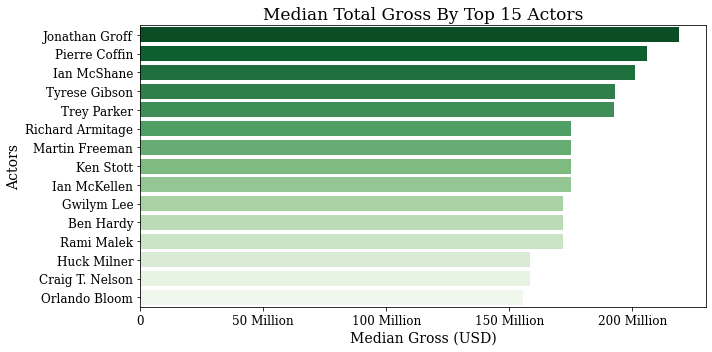

In [28]:
# our data for this graph
top15_med_gross_actor = median_foreign_gross_per_actor.sort_values(
    by='foreign_gross', ascending=False).head(15)

# specify size of plot
fig, ax = plt.subplots(figsize=(10, 5))

# create bar plot
sns.barplot(data=top15_med_gross_actor,
            x='foreign_gross',
            y='primary_name',
            ci=None,
            palette='Greens_r')

# lable and define fontsize for main and axes titles
plt.xlabel('Median Gross (USD)', fontsize=14)
plt.ylabel('Actors', fontsize=14)
plt.title('Median Total Gross By Top 15 Actors', fontsize=17)
plt.tick_params(axis='both', which='major', labelsize=12)

# set x-axes tick labels
ax.set_xticklabels(['0', '50 Million', '100 Million',
                   '150 Million', '200 Million', '250 Million'])

plt.tight_layout()
plt.show()

#### Answer: Is there a relationship between specific actors and higher grossing films?

At a glace, we do see that there is a significant difference between the median gross of films with different actors. Suprisingly, there are only a few household names in the final 15. This may relate back to our previous finding, which is that animated films is the highest grossing movie genre. In animated films, one doesn't see the actors faces, and as such may be more 'anonymous' and unkown to the average movie watcher. On a seperate note, it is suprising that this list is comprised only of men. 
 
Before, the analysis seemed to indicate that Lets see if any of the top 15 actors were involved in animated films.


In [1]:
top15_in_animation = []
for name, gross, genres in zip(join_actors_gross['primary_name'], join_actors_gross['foreign_gross'], join_actors_gross['genres']):
    if genres is not None and 'Animation' in genres:
        top15_in_animation.append([name, gross, genres, True])
    else:
        top15_in_animation.append([name, gross, genres, False])


top15_in_animation = pd.DataFrame(
    new_df, columns=['name', 'gross', 'genres', 'Is Animation in Genres'])
top15_in_animation.groupby(['name'], as_index=False).median().sort_values(
    by='gross', ascending=False).head(15)

NameError: name 'join_actors_gross' is not defined

### Do movies with higher average ratings result in higher grossing films?

Our final question! Lets look at the datset where we had the `averagerating` data again:

In [50]:
imbd_movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


Okay! Lets do some inner joins so we can get the total gross and the average ratings.

The final dataset is 1190 average ratings, each representing

In [51]:
join_ratings_gross = pd.read_sql("""
    SELECT bom.foreign_gross, ratings.averagerating
    FROM bom_df AS bom
            /*joining bom_df and movie_basics*/
        INNER JOIN 
        movie_basics AS bas
        ON bom.title=bas.original_title AND bom.year=bas.start_year
            /*joining movie_ratings to dataset*/
        INNER JOIN
        movie_ratings AS ratings
        ON ratings.movie_id=bas.movie_id;
        """, conn)
join_ratings_gross

,foreign_gross,averagerating
0,652000000.0,8.3
1,535700000.0,8.8
2,513900000.0,6.3
3,398000000.0,5.0
4,311500000.0,7.0
...,...,...
1185,1200000.0,6.2
1186,2000000.0,6.9
1187,1500000.0,5.7
1188,229000.0,6.2


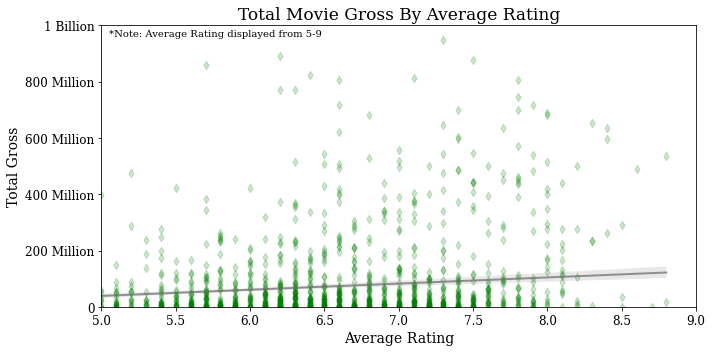

In [52]:
# save our dataframe as we want it
sorted_join_ratings_gross = join_ratings_gross.sort_values(
    by='foreign_gross', ascending=False)

# specify size of plot
fig, ax = plt.subplots(figsize=(10, 5))

# set axis ticks and labels
plt.gca().set(xlim=(5, 9))
plt.gca().set(ylim=(0, 1000000000))
ax.set_yticklabels(['0', '200 Million', '400 Million',
                   '600 Million', '800 Million', '1 Billion'])
plt.tick_params(axis='both', which='major', labelsize=12)

# add regression line
sns.regplot(sorted_join_ratings_gross.averagerating, sorted_join_ratings_gross.foreign_gross,
            scatter_kws={'color': 'g', 'alpha': 0.2}, line_kws={'color': 'dimgray', 'alpha': 0.7, 'lw': 2}, marker='d',
            robust=True)

# specifiy axis and title labels
plt.title('Total Movie Gross By Average Rating', fontsize=17)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Total Gross', fontsize=14)

# adding note that x axis starts at 5
plt.text(5.05, 960000000, '*Note: Average Rating displayed from 5-9')


plt.tight_layout()
plt.show()

Hmm, it doesn't seem like there is a strong correlation between these the ratings and the total gross. Lets check pearsons correlation, and see if there is a signifigant correlation. 

In [53]:
# pearsons correlation
sorted_join_ratings_gross.corr()

,foreign_gross,averagerating
foreign_gross,1.000000,0.237023
averagerating,0.237023,1.000000


Anything under .25 is considered no correlation - so while there is a very, very slight positive correlation between ratings and total gross, it's not signifigant. Based on these results, one may conclude that you don't have to make amazing movies in order to end up with financially sucessfull movies. 

# Conclusion
*Conclusion summarizes implications of the project for the real-world problem and stakeholders*
